# PISA Data 2012 – What influences students' school performance?
## by Zora Schärer

## Investigation Overview

In this project I looked at the variables that potentially influence the performance of students around the world in three different areas: mathematics, reading and science. I chose three different domains of independent variables: students characteristics, social/family background and school characteristics.

## Dataset Overview

The original dataset consisted of about 480.000 students and 635 variables. I reduced the variables to a number of 19, including one so called plausible value (PV) for each of the three areas. These PVs are the measure for the school performance of the students. The students/schools came from 68 different countries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the datasets need for plotting
pisa_explore = pd.read_csv('pisa_explore.csv')
pisa_long = pd.read_csv('pisa_long.csv')

In [3]:
# creat order categorical types for parents_edu and performance
parents_edu_order = ['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = parents_edu_order)
pisa_explore.loc[:,'parents_edu'] = pisa_explore.loc[:,'parents_edu'].astype(ordered_var)
pisa_long.loc[:,'parents_edu'] = pisa_long.loc[:,'parents_edu'].astype(ordered_var)

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ['low performance','mid performance','high performance'])
pisa_explore.loc[:,'performance'] = pisa_explore.loc[:,'performance'].astype(ordered_var)
pisa_long.loc[:,'performance'] = pisa_long.loc[:,'performance'].astype(ordered_var)

## Distribution of plausible values

The PVs for all three areas are normally distributed on a linear scale and range from about 100 to about 820.

In [6]:
# Define function for plotting histograms with reasonable bin size
def plot_hist(x, bin_size):
    b = np.arange(x.min(),x.max()+bin_size, bin_size);
    plt.hist(x, bins = b);
    plt.ylabel('Count');

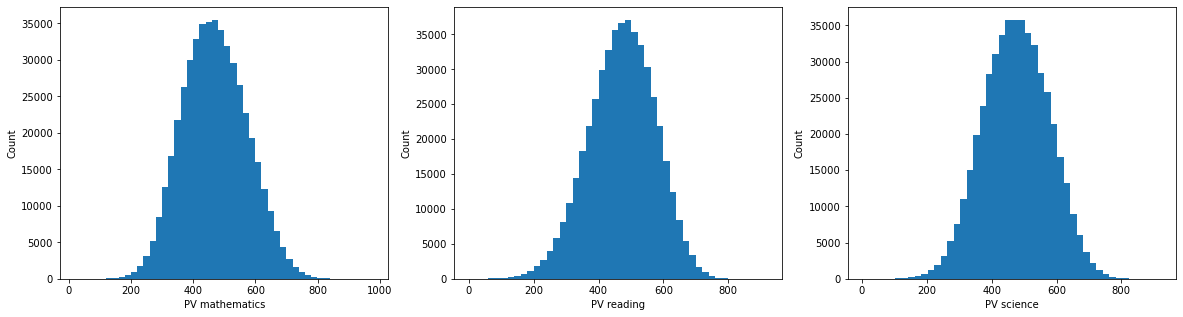

In [7]:
plt.figure(figsize = [20, 5])
# math_pv
plt.subplot(1,3,1)
plot_hist(pisa_explore.math_pv, 20)
plt.xlabel('PV mathematics');
# reading_pv
plt.subplot(1,3,2)
plot_hist(pisa_explore.reading_pv, 20)
plt.xlabel('PV reading');
# science_pv
plt.subplot(1,3,3)
plot_hist(pisa_explore.science_pv, 20)
plt.xlabel('PV science');

## Correlation matrix

The correlation matrix shows a high correlation among the three PVs. This means, students generally perform well at school and not in one isolated area. Apart from that, the three PVs correlate with almost none of the independent variables. The only noteable - but not strong - positive correlation can be observed with economic status, which is quite disillusioning.\
The correlation matrix als shows a slight positive correlation between the students' attitude towards school outcomes and the student-teacher relationship. The same holds for the students' feeling of beloning to the school and the student-teacher relationship. So, a positive feeling towards the teacher seems to be related to a postive feeling towards the school.

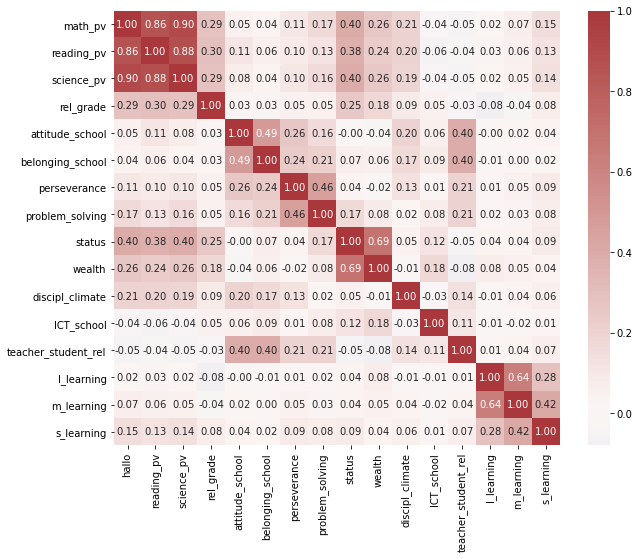

In [11]:
# correlation matrix numerical variables
num_vars = ['math_pv','reading_pv','science_pv','rel_grade','attitude_school', 'belonging_school',
                'perseverance', 'problem_solving', 'status', 'wealth', 'discipl_climate', 
                 'ICT_school', 'teacher_student_rel', 'l_learning', 'm_learning', 's_learning'] # numerical variables
plt.figure(figsize = [10, 8])
sb.heatmap(pisa_explore[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag', center = 0);
plt.xticks(np.arange(.5,16.5), ['PV maths','PV reading','PV science','Relative grade','Attitude towards school outcome',
                                'Feeling of belonging to school', 'Perseverance', 'Openness to problem-solving', 
                                'Economic status', 'Wealth', 'Disciplinary climate at school', 
                 'ICT_school', 'teacher_student_rel', 'l_learning', 'm_learning', 's_learning']);

## Country ranking



In [ ]:
# plot all three areas by country in one figure
# order countries by math_pv
country_order = pisa_explore.groupby('country').mean().math_pv.sort_values(axis = 0, ascending = False).index
# plot
plt.figure(figsize = [20, 5]);
sb.pointplot(data = pisa_long, x = 'country', y = 'pv', hue = 'area', linestyles = '', order = country_order)
plt.xticks(rotation = 90);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!